In [1]:
## Carrega bibliotecas utilizadas

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch, Polygon
from matplotlib.lines import Line2D

from IPython.display import display, Markdown

## Verifica a versão da matplotlib instalada
mpl.__version__

'3.7.0'

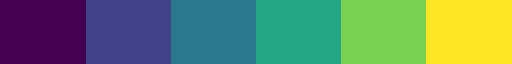

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [2]:
# Define paleta de cores

# # alternativa A: definição manual das cores a partir de lista de cores em hex
# coresViridis = ["#440154","#3b528b","#21918c","#5ec962","#fde725"]

# alternativa B: definição de cores utilizando palette do próprio matplotlib
# a paleta viridis é robusta para pessoas com daltonismo
vcmap = plt.get_cmap("viridis", 6) # um a mais do que o necessário para evitar utilizar o amarelo

# exibe o mapa de cores
display(vcmap)

# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)] # extrai lista de cores em hex
display(coresViridis)

# define uma cor default
corDefault = coresViridis[1]

# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

# plt.rcdefaults() # Restaura a configuração default

In [3]:
# Carrega e prepara dados
# Dados dos países do G20 (includindo Espanha, excluindo União Europaia) obtidos do Banco Mundial:
# https://databank.worldbank.org/G20-pop-gdp-imp-exp-gini/id/d0bc168d

# Carrrega dados brutos do G20
G20 = pd.read_csv("https://raw.githubusercontent.com/simonedjb/ccec-vis-info-pub/main/dados/G20-WorldDev-02.csv",
                  na_values="..",
                  skipfooter=5,
                  engine="python").drop(columns="Series Code")

# Examina o dataframe carregado
G20

,Country Name,Country Code,Series Name,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Argentina,ARG,GDP (current US$),5.459824e+11,5.520251e+11,5.263197e+11,5.947493e+11,5.575314e+11,6.436287e+11,5.248197e+11,4.528184e+11,3.895910e+11,4.914927e+11
1,Argentina,ARG,GDP growth (annual %),-1.026420e+00,2.405324e+00,-2.512615e+00,2.731160e+00,-2.080328e+00,2.818503e+00,-2.617396e+00,-2.025934e+00,-9.895269e+00,1.026376e+01
2,Argentina,ARG,GDP per capita growth (annual %),-2.145284e+00,1.265685e+00,-3.578581e+00,1.629664e+00,-3.110064e+00,1.757648e+00,-3.601610e+00,-2.994388e+00,-1.076511e+01,9.223956e+00
3,Argentina,ARG,GDP per capita (current US$),1.308266e+04,1.308025e+04,1.233480e+04,1.378906e+04,1.279024e+04,1.461304e+04,1.179516e+04,1.007636e+04,8.585695e+03,1.072923e+04
4,Argentina,ARG,Imports of goods and services (% of GDP),1.428868e+01,1.471676e+01,1.400132e+01,1.178057e+01,1.356679e+01,1.396932e+01,1.632585e+01,1.451850e+01,1.355632e+01,1.512831e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,United States,USA,Imports of goods and services (current US$),2.769317e+12,2.766375e+12,2.887445e+12,2.794850e+12,2.738359e+12,2.923691e+12,3.129697e+12,3.115990e+12,2.774597e+12,NaN
196,United States,USA,Exports of goods and services (% of GDP),1.364405e+01,1.357807e+01,1.354596e+01,1.246099e+01,1.193954e+01,1.223719e+01,1.234224e+01,1.178954e+01,1.016290e+01,NaN
197,United States,USA,Exports of goods and services (current US$),2.217700e+12,2.286981e+12,2.377408e+12,2.268651e+12,2.232110e+12,2.383758e+12,2.533511e+12,2.519727e+12,2.123410e+12,NaN
198,United States,USA,"Population, total",3.138777e+08,3.160599e+08,3.183863e+08,3.207390e+08,3.230718e+08,3.251221e+08,3.268382e+08,3.283300e+08,3.315011e+08,3.318937e+08


In [4]:
# Dicionário para atribuir continentes aos países listados
realPaisContinente = {
    "Argentina": "Américas",
    "Australia": "Oceania",
    "Brazil": "Américas",
    "Canada": "Américas",
    "China": "Ásia",
    "France": "Europa",
    "Germany": "Europa",
    "India": "Ásia",
    "Indonesia": "Oceania",
    "Italy": "Europa",
    "Japan": "Ásia",
    "Korea, Rep.": "Ásia",
    "Mexico": "Américas",
    "Russian Federation": "Europa",
    "Saudi Arabia": "Ásia",
    "South Africa": "África",
    "Turkiye": "Ásia",
    "United Kingdom": "Europa",
    "United States": "Américas",
    "Spain": "Europa"
}

# Cria uma coluna associando os continentes aos países
G20["Continent"] = G20.apply(lambda row: realPaisContinente[row["Country Name"]], axis = 1)

# Examina o dataframe resultante
G20

,Country Name,Country Code,Series Name,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],Continent
0,Argentina,ARG,GDP (current US$),5.459824e+11,5.520251e+11,5.263197e+11,5.947493e+11,5.575314e+11,6.436287e+11,5.248197e+11,4.528184e+11,3.895910e+11,4.914927e+11,Américas
1,Argentina,ARG,GDP growth (annual %),-1.026420e+00,2.405324e+00,-2.512615e+00,2.731160e+00,-2.080328e+00,2.818503e+00,-2.617396e+00,-2.025934e+00,-9.895269e+00,1.026376e+01,Américas
2,Argentina,ARG,GDP per capita growth (annual %),-2.145284e+00,1.265685e+00,-3.578581e+00,1.629664e+00,-3.110064e+00,1.757648e+00,-3.601610e+00,-2.994388e+00,-1.076511e+01,9.223956e+00,Américas
3,Argentina,ARG,GDP per capita (current US$),1.308266e+04,1.308025e+04,1.233480e+04,1.378906e+04,1.279024e+04,1.461304e+04,1.179516e+04,1.007636e+04,8.585695e+03,1.072923e+04,Américas
4,Argentina,ARG,Imports of goods and services (% of GDP),1.428868e+01,1.471676e+01,1.400132e+01,1.178057e+01,1.356679e+01,1.396932e+01,1.632585e+01,1.451850e+01,1.355632e+01,1.512831e+01,Américas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,United States,USA,Imports of goods and services (current US$),2.769317e+12,2.766375e+12,2.887445e+12,2.794850e+12,2.738359e+12,2.923691e+12,3.129697e+12,3.115990e+12,2.774597e+12,NaN,Américas
196,United States,USA,Exports of goods and services (% of GDP),1.364405e+01,1.357807e+01,1.354596e+01,1.246099e+01,1.193954e+01,1.223719e+01,1.234224e+01,1.178954e+01,1.016290e+01,NaN,Américas
197,United States,USA,Exports of goods and services (current US$),2.217700e+12,2.286981e+12,2.377408e+12,2.268651e+12,2.232110e+12,2.383758e+12,2.533511e+12,2.519727e+12,2.123410e+12,NaN,Américas
198,United States,USA,"Population, total",3.138777e+08,3.160599e+08,3.183863e+08,3.207390e+08,3.230718e+08,3.251221e+08,3.268382e+08,3.283300e+08,3.315011e+08,3.318937e+08,Américas


In [5]:
# Reformata o dataframe para o formato longo, criando uma coluna Year (ano)
G20_long = pd.melt(G20, id_vars = ["Country Name", "Country Code", "Continent", "Series Name"],
                   var_name = "Year",
                   value_name = "Value")

# Transforma a coluna Year para conter somente o valor numérico do ano
G20_long['Year'] = G20_long['Year'].apply(lambda x: int(x[:4]))

# Examina o dataframe resultante
G20_long

,Country Name,Country Code,Continent,Series Name,Year,Value
0,Argentina,ARG,Américas,GDP (current US$),2012,5.459824e+11
1,Argentina,ARG,Américas,GDP growth (annual %),2012,-1.026420e+00
2,Argentina,ARG,Américas,GDP per capita growth (annual %),2012,-2.145284e+00
3,Argentina,ARG,Américas,GDP per capita (current US$),2012,1.308266e+04
4,Argentina,ARG,Américas,Imports of goods and services (% of GDP),2012,1.428868e+01
...,...,...,...,...,...,...
1995,United States,USA,Américas,Imports of goods and services (current US$),2021,NaN
1996,United States,USA,Américas,Exports of goods and services (% of GDP),2021,NaN
1997,United States,USA,Américas,Exports of goods and services (current US$),2021,NaN
1998,United States,USA,Américas,"Population, total",2021,3.318937e+08


In [6]:
# Examina o nome de todas as séries de dados
sorted(set(G20_long['Series Name']))

['Exports of goods and services (% of GDP)',
 'Exports of goods and services (current US$)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GDP per capita (current US$)',
 'GDP per capita growth (annual %)',
 'Gini index',
 'Imports of goods and services (% of GDP)',
 'Imports of goods and services (current US$)',
 'Population, total']

In [7]:
# Cria dataframe com os volumes de importação e exportação relativos ao PIB
# Cria dataframe com apenas os dados a serem visualizados
ie_long = G20_long[(G20_long['Series Name'] == 'Imports of goods and services (% of GDP)') | (G20_long['Series Name'] == 'Exports of goods and services (% of GDP)')].copy()

# Examine dataframe criado
ie_long

,Country Name,Country Code,Continent,Series Name,Year,Value
4,Argentina,ARG,Américas,Imports of goods and services (% of GDP),2012,14.288683
6,Argentina,ARG,Américas,Exports of goods and services (% of GDP),2012,16.237859
14,Australia,AUS,Oceania,Imports of goods and services (% of GDP),2012,21.672765
16,Australia,AUS,Oceania,Exports of goods and services (% of GDP),2012,21.504677
24,Brazil,BRA,Américas,Imports of goods and services (% of GDP),2012,13.236735
...,...,...,...,...,...,...
1976,Turkiye,TUR,Ásia,Exports of goods and services (% of GDP),2021,35.395628
1984,United Kingdom,GBR,Europa,Imports of goods and services (% of GDP),2021,28.246256
1986,United Kingdom,GBR,Europa,Exports of goods and services (% of GDP),2021,26.990049
1994,United States,USA,Américas,Imports of goods and services (% of GDP),2021,NaN


In [8]:
# Cria dataframe no formato "wide" com valores de exportação e importação
ie_wide = pd.pivot(ie_long, index = ['Country Name', 'Country Code', 'Continent', 'Year'], columns= 'Series Name', values='Value').reset_index()
ie_wide

Series Name,Country Name,Country Code,Continent,Year,Exports of goods and services (% of GDP),Imports of goods and services (% of GDP)
0,Argentina,ARG,Américas,2012,16.237859,14.288683
1,Argentina,ARG,Américas,2013,14.617173,14.716756
2,Argentina,ARG,Américas,2014,14.405479,14.001315
3,Argentina,ARG,Américas,2015,10.705652,11.780574
4,Argentina,ARG,Américas,2016,12.527095,13.566793
...,...,...,...,...,...,...
195,United States,USA,Américas,2017,12.237189,15.008973
196,United States,USA,Américas,2018,12.342241,15.246618
197,United States,USA,Américas,2019,11.789535,14.579387
198,United States,USA,Américas,2020,10.162899,13.279559


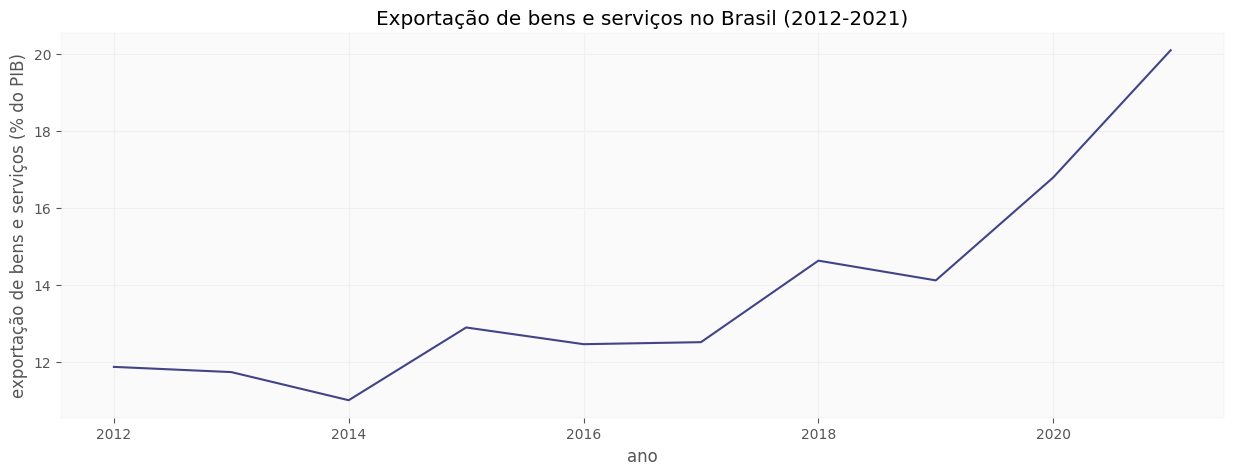

In [9]:
## Gráfico de linha simples, com os dados de exportação do Brasil relativos ao PIB

# Plota a linha e inclui título e rótulos dos eixos
# Função pyplot.plot() para linha
# Função Axes.set_title() para o título
# Funções Axes.set_xlabel() e Axes.set_ylabel() para os rótulos dos eixos

# Cria dataframe somente com dados do Brasil
ie_br = ie_wide[ie_wide['Country Code'] == 'BRA'].copy()

# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 5
fig, ax = plt.subplots(figsize = (15,5))

# Plota o gráfico de linha
# Note que os parâmetros para os vetores associados os eixos X e Y não devem ser nomeados
ax.plot(ie_br['Year'], ie_br['Exports of goods and services (% of GDP)'],
        color = corDefault)

# Acrescenta um título ao gráfico
ax.set_title('Exportação de bens e serviços no Brasil (2012-2021)')

# Define os rótulos dos eixos
ax.set_xlabel('ano')
ax.set_ylabel('exportação de bens e serviços (% do PIB)') # é importante esclarecer a unidade e a ordem de grandeza

# Exibe o gráfico
plt.show()

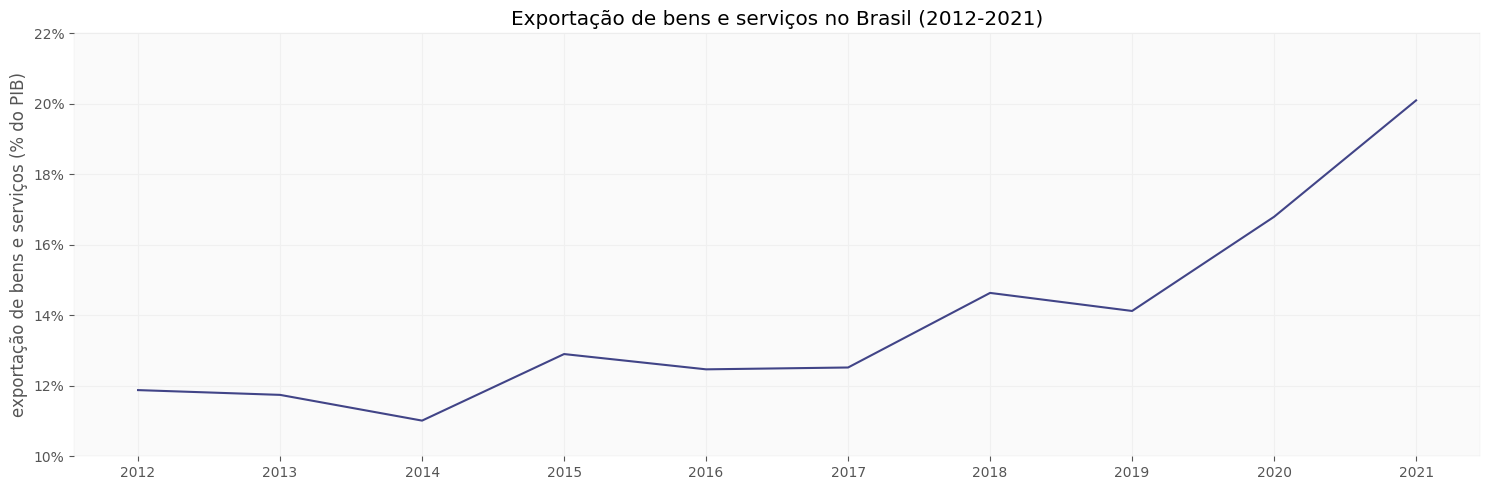

In [10]:
# Ajusta os eixos
# eixo X para mostrar todos os países: Axes.set_xticks
# eixo Y para mostrar o sinal de %: Axes.set_yticks

# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 5
fig, ax = plt.subplots(figsize = (15,5))

# Plota o gráfico de linha
# Note que os parâmetros para os vetores associados os eixos X e Y não devem ser nomeados
ax.plot(ie_br['Year'], ie_br['Exports of goods and services (% of GDP)'],
        color = corDefault)

# Acrescenta um título ao gráfico
ax.set_title('Exportação de bens e serviços no Brasil (2012-2021)')

# Define os rótulos dos eixos
# ax.set_xlabel('ano') # pode ser considerado desnecessário
ax.set_ylabel('exportação de bens e serviços (% do PIB)') # é importante esclarecer a unidade e a ordem de grandeza

# Define os valores do eixo X
ax.set_xticks(ticks = ie_br['Year'], labels = ie_br['Year'])

# Calcula as posições dos valores no eixo Y conforme o intervalo desejado
ymin = math.floor(min(ie_br['Exports of goods and services (% of GDP)'])) // 2 * 2
ymax = (math.ceil(max(ie_br['Exports of goods and services (% of GDP)'])) // 2 + 2) * 2
yticks = np.arange(start = ymin, stop = ymax, step = 2)
# Define os valores do eixo Y
ax.set_yticks(ticks = yticks, labels = ["{:.0f}%".format(y) for y in yticks])

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

# Armazena o gráfico (em diferentes formatos):
# - formatos vetoriais (NÃO perdem resolução quando redimensionados)
plt.savefig("linha-simples.pdf")
plt.savefig("linha-simples.svg")
# - formato rasterizado (perde resolução quando redimensionado)
plt.savefig("linha-simples.png", dpi = 150, format = "png")

# Exibe o gráfico
plt.show()

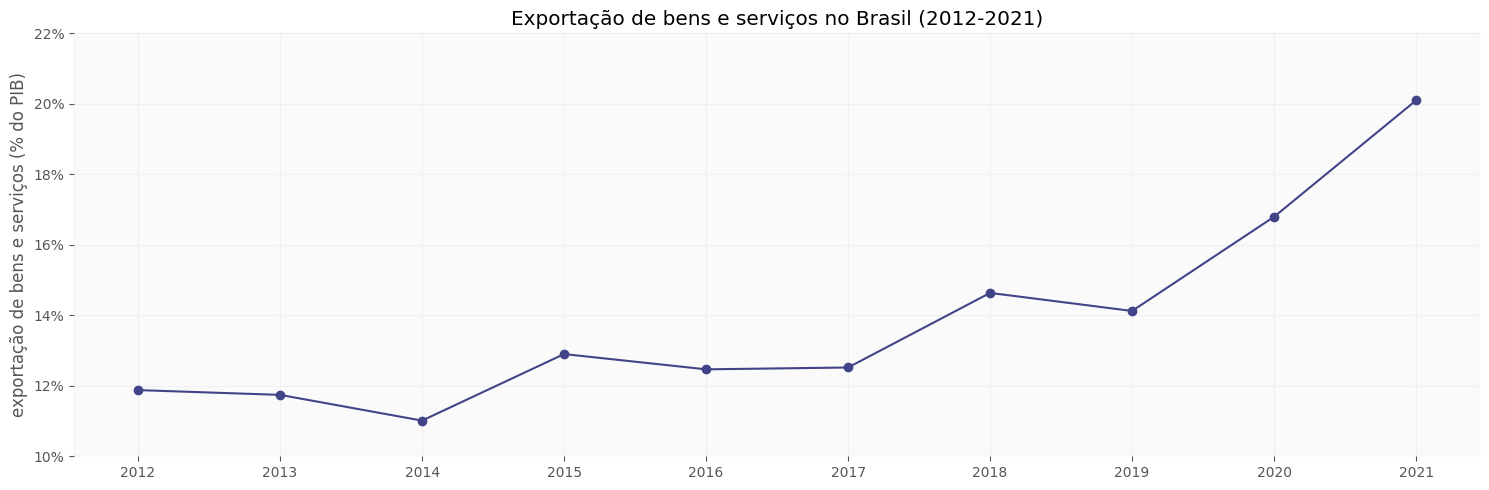

In [11]:
# Variação: Linha com pontos
# parâmetro marker na Axes.plot()

# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 5
fig, ax = plt.subplots(figsize = (15,5))

# Plota o gráfico de linha
# Note que os parâmetros para os vetores associados os eixos X e Y não devem ser nomeados
ax.plot(ie_br['Year'], ie_br['Exports of goods and services (% of GDP)'],
        color = corDefault,
        marker = "o")

# Acrescenta um título ao gráfico
ax.set_title('Exportação de bens e serviços no Brasil (2012-2021)')

# Define os rótulos dos eixos
# ax.set_xlabel('ano') # pode ser considerado desnecessário
ax.set_ylabel('exportação de bens e serviços (% do PIB)') # é importante esclarecer a unidade e a ordem de grandeza

# Define os valores do eixo X
ax.set_xticks(ticks = ie_br['Year'], labels = ie_br['Year'])

# Calcula as posições dos valores no eixo Y conforme o intervalo desejado
ymin = math.floor(min(ie_br['Exports of goods and services (% of GDP)'])) // 2 * 2
ymax = (math.ceil(max(ie_br['Exports of goods and services (% of GDP)'])) // 2 + 2) * 2
yticks = np.arange(start = ymin, stop = ymax, step = 2)
# Define os valores do eixo Y
ax.set_yticks(ticks = yticks, labels = ["{:.0f}%".format(y) for y in yticks])

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

# Armazena o gráfico (em diferentes formatos):
# - formatos vetoriais (NÃO perdem resolução quando redimensionados)
plt.savefig("linha-simples.pdf")
plt.savefig("linha-simples.svg")
# - formato rasterizado (perde resolução quando redimensionado)
plt.savefig("linha-simples.png", dpi = 150, format = "png")

# Exibe o gráfico
plt.show()

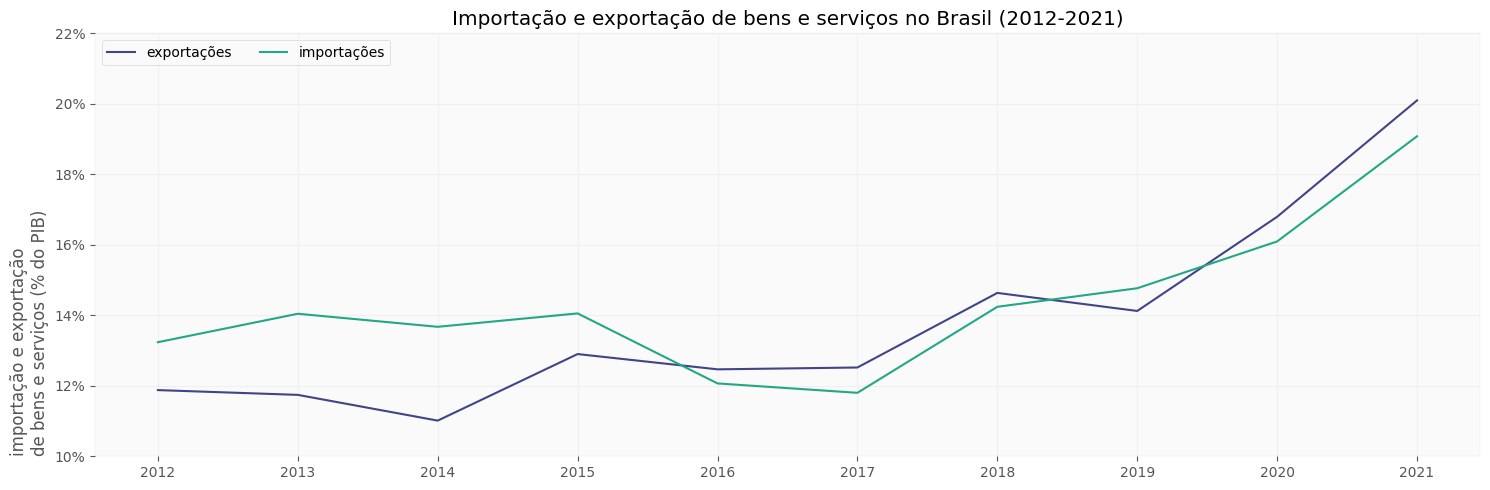

In [12]:
# Gráfico de linhas múltiplas
# inclui duas linhas: função Axes.plot()
# define o rótulo de cada linha: parâmetro label da função Axes.plot()
# inclui legenda: função Pyplot.legend()

# Cria dataframe somente com dados do Brasil
ie_br = ie_wide[ie_wide['Country Code'] == 'BRA'].copy()

# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 5
fig, ax = plt.subplots(figsize = (15,5))

# Plota o gráfico de linha
# Note que os parâmetros para os vetores associados os eixos X e Y não devem ser nomeados
ax.plot(ie_br['Year'], ie_br['Exports of goods and services (% of GDP)'],
        color = coresViridis[1], label = 'exportações')

ax.plot(ie_br['Year'], ie_br['Imports of goods and services (% of GDP)'],
        color = coresViridis[3], label = 'importações')

# Acrescenta um título ao gráfico
ax.set_title('Importação e exportação de bens e serviços no Brasil (2012-2021)')

# Define os rótulos dos eixos
# ax.set_xlabel('ano')
ax.set_ylabel('importação e exportação \nde bens e serviços (% do PIB)', y = 0, horizontalalignment = 'left') # é importante esclarecer a unidade e a ordem de grandeza

# Define os valores do eixo X
ax.set_xticks(ticks = ie_br['Year'], labels = ie_br['Year'])

# Calcula as posições dos valores no eixo Y conforme o intervalo desejado
ymin = math.floor(min(ie_br['Exports of goods and services (% of GDP)'].tolist() + ie_br['Imports of goods and services (% of GDP)'].tolist())) // 2 * 2
ymax = (math.ceil(max(ie_br['Exports of goods and services (% of GDP)'].tolist() + ie_br['Imports of goods and services (% of GDP)'].tolist())) // 2 + 2) * 2
yticks = np.arange(start = ymin, stop = ymax, step = 2)

# Define os valores do eixo Y
ax.set_yticks(ticks = yticks, labels = ["{:.0f}%".format(y) for y in yticks])

# Acrescenta legenda
plt.legend(loc = 'upper left', ncol = 2)

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

# Armazena o gráfico (em diferentes formatos):
# - formatos vetoriais (NÃO perdem resolução quando redimensionados)
plt.savefig("linhas-multiplas.pdf")
plt.savefig("linhas-multiplas.svg")
# - formato rasterizado (perde resolução quando redimensionado)
plt.savefig("linhas-multiplas.png", dpi = 150, format = "png")

# Exibe o gráfico
plt.show()

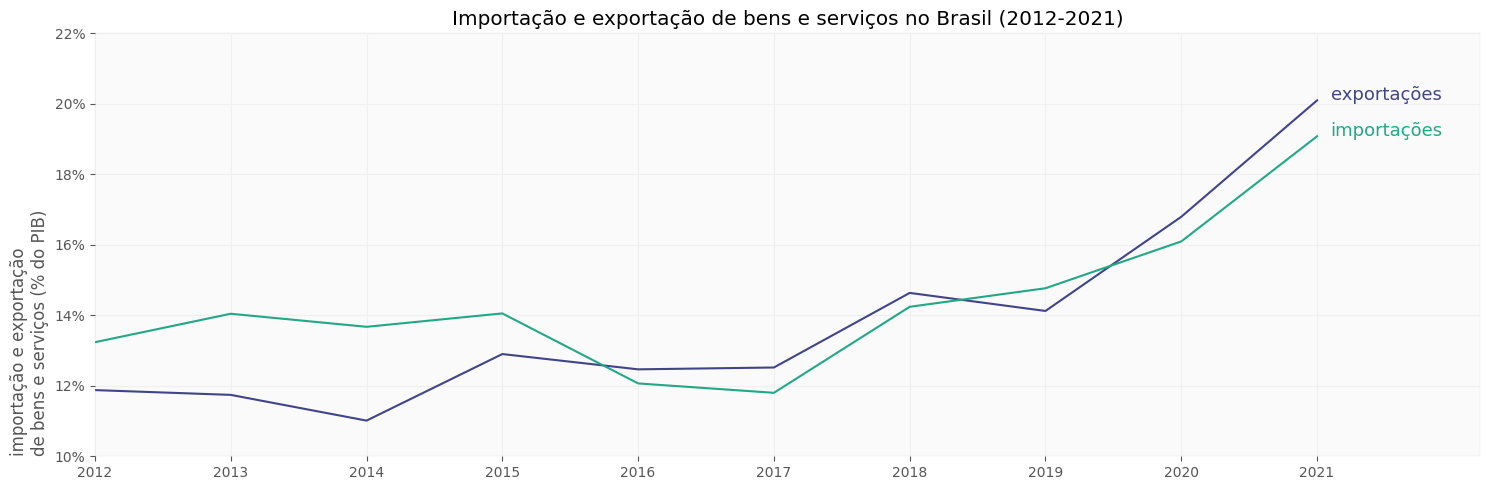

In [13]:
# Variação: rótulos ao lado das linhas, e não uma legenda separada

# Cria dataframe somente com dados do Brasil
ie_br = ie_wide[ie_wide['Country Code'] == 'BRA'].copy()

# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 5
fig, ax = plt.subplots(figsize = (15,5))

# Plota o gráfico de linha
# Note que os parâmetros para os vetores associados os eixos X e Y não devem ser nomeados
l1 = ax.plot(ie_br['Year'], ie_br['Exports of goods and services (% of GDP)'],
             color = coresViridis[1],
             label = 'exportações')

l2 = ax.plot(ie_br['Year'], ie_br['Imports of goods and services (% of GDP)'],
             color = coresViridis[3],
             label = 'importações')

# Acrescenta um título ao gráfico
ax.set_title('Importação e exportação de bens e serviços no Brasil (2012-2021)')

# Define os rótulos dos eixos
# ax.set_xlabel('ano')
ax.set_ylabel('importação e exportação \nde bens e serviços (% do PIB)', y = 0, horizontalalignment = 'left') # é importante esclarecer a unidade e a ordem de grandeza

# Define os valores do eixo X
ax.set_xticks(ticks = ie_br['Year'], labels = ie_br['Year'])

# Calcula as posições dos valores no eixo Y conforme o intervalo desejado
ymin = math.floor(min(ie_br['Exports of goods and services (% of GDP)'].tolist() + ie_br['Imports of goods and services (% of GDP)'].tolist())) // 2 * 2
ymax = (math.ceil(max(ie_br['Exports of goods and services (% of GDP)'].tolist() + ie_br['Imports of goods and services (% of GDP)'].tolist())) // 2 + 2) * 2
yticks = np.arange(start = ymin, stop = ymax, step = 2)

# Define os valores do eixo Y
ax.set_yticks(ticks = yticks, labels = ["{:.0f}%".format(y) for y in yticks])

# Aumenta os limites do eixo X para abrir espaço para o rótulo da série ao lado de cada linha
plt.xlim([min(ie_br["Year"]), max(ie_br["Year"]) + 1.2 ])

# Anota o gráfico com os nomes das séries ao final de cada linha
handles = ax.get_legend_handles_labels()
for i in range(len(handles)):
    maxx = max(handles[0][i].get_xdata()) # dados X da linha
    maxy = max(handles[0][i].get_ydata()) # dados Y da linha
    label = handles[1][i]                 # rótulo da linha (parâmetro label no Axes.plot)
    ax.annotate(text = label, xy = (maxx+0.1, maxy), color = handles[0][i].get_color(), size = 13)

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

# Armazena o gráfico (em diferentes formatos):
# - formatos vetoriais (NÃO perdem resolução quando redimensionados)
plt.savefig("linhas-multiplas-rotulos.pdf")
plt.savefig("linhas-multiplas-rotulos.svg")
# - formato rasterizado (perde resolução quando redimensionado)
plt.savefig("linhas-multiplas-rotulos.png", dpi = 150, format = "png")

# Exibe o gráfico
plt.show()